In [1]:
# http://publications.jrc.ec.europa.eu/repository/bitstream/JRC92666/lbna27031enn.pdf
import gdal
from gdalconst import * 

import matplotlib.pyplot as plt
import os
import numpy as np
import operator
%matplotlib inline

In [2]:
os.system('rm -f waterVH.tiff')
os.system('rm -f waterVV.tiff')
vhfile = '/home/cvandevries/Documents/S1A_IW_GRDH_1SDV_20151008T055819_20151008T055844_008057_00B493_241C.SAFE/measurement/s1a-iw-grd-vh-20151008t055819-20151008t055844-008057-00b493-002.tiff'
vvfile = '/home/cvandevries/Documents/S1A_IW_GRDH_1SDV_20151008T055819_20151008T055844_008057_00B493_241C.SAFE/measurement/s1a-iw-grd-vv-20151008t055819-20151008t055844-008057-00b493-001.tiff'
commandVH = 'gdalwarp -t_srs EPSG:4326 -te 2.5 51.00 3.5 51.44  ' + vhfile + ' waterVH.tiff'
commandVV = 'gdalwarp -t_srs EPSG:4326 -te 2.5 51.00 3.5 51.44  ' + vvfile + ' waterVV.tiff'
os.system(commandVH)
os.system(commandVV)

0

In [3]:
# cs2cs +init=epsg:4326 +to +init=epsg:3857
dataVV = gdal.Open('waterVV.tiff', GA_ReadOnly)
bandVV = dataVV.GetRasterBand(1)
bandVV = bandVV.ReadAsArray()

dataVH = gdal.Open('waterVH.tiff', GA_ReadOnly)
bandVH = dataVH.GetRasterBand(1)
bandVH = bandVH.ReadAsArray()

dataVV, dataVH = None,None
print bandVV
print bandVH
band = list(map(operator.add, bandVH, bandVV))


[[ 99  91  91 ..., 103 105 119]
 [118  94  79 ..., 126 115 138]
 [ 92 104  94 ..., 121  87  88]
 ..., 
 [240 287 328 ..., 172 167 218]
 [247 322 294 ..., 308 268 213]
 [291 329 349 ..., 235 172  80]]
[[ 18  24  24 ...,  37  35  35]
 [ 23  22  18 ...,  19  33  28]
 [ 18  21  21 ...,  25  29  35]
 ..., 
 [106  85  68 ...,  73  54  48]
 [ 73  82  80 ...,  79  62  67]
 [ 56  62  80 ...,  46  56  89]]


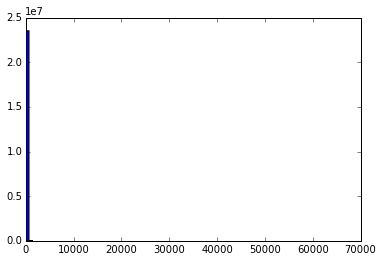

In [9]:
_=plt.hist(bandVV.flat, bins= 100)
# plt.xlim(50000,70000)
# plt.ylim(0,5)

In [12]:
scatter = np.zeros(len(bandVV))
for i in range(len(bandVV)):
    scatter[i] = (bandVV == i).sum()

In [ ]:
plt.plot(scatter)
plt.ylabel('Pixels')
plt.title('Devision of pixels')


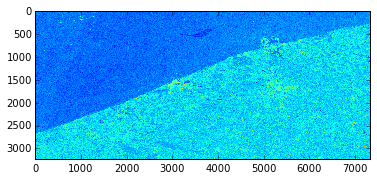

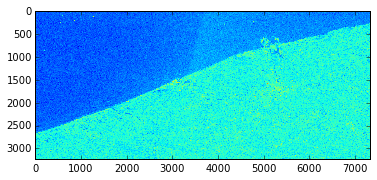

In [8]:
plt.imshow(np.log10(bandVV))
plt.figure()
plt.imshow(np.log10(bandVH))
